In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

#import relevant packages for multiple regresison and machine learning

In [2]:
data = pd.read_csv('real_estate_price_size_year.csv') #load data

In [3]:
data #check data
# note, the year feature denotes year from 2006, i.e., 0 = 2006, 3 = 2009, 12 = 2018, etc... 

,price,size,year
0,245050.280,575.19,0
1,175716.480,620.82,0
2,444192.008,1300.96,0
3,440201.616,1379.72,0
4,234178.160,623.94,0
...,...,...,...
95,376253.808,1009.25,12
96,211904.536,601.66,12
97,354512.112,1236.93,12
98,251140.656,694.52,12


In [4]:
data.head() #check data again but first 5 frames

,price,size,year
0,245050.280,575.19,0
1,175716.480,620.82,0
2,444192.008,1300.96,0
3,440201.616,1379.72,0
4,234178.160,623.94,0


In [5]:
data.describe() #descriptives of our main variables, note Price = DV, Size/Year = IVs

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,6.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,0.000000
25%,234280.148000,643.330000,3.000000
50%,280590.716000,696.405000,9.000000
75%,335723.696000,1029.322500,12.000000
max,500681.128000,1842.510000,12.000000


In [6]:
## Create the linear regression 
# Declare the IVs and DV

x = data[['size', 'year']]
y = data[['price']]

In [7]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [8]:
reg.coef_ #unstandardised coefficients

array([[ 227.70085401, 2916.78532684]])

In [9]:
reg.intercept_ #intercept

array([78804.34817382])

In [10]:
reg.score(x,y) #R squared for the model

0.7764803683276793

## Formula for R-squared adjusted

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

note, n = no. of observations (i.e.,100); p = no. of predictors (i.e., 2)

In [11]:
r2 = reg.score(x,y)
n = x.shape[0] #this is the number of observations in our data frame
p = x.shape[1] #this is the number of predictors in our data frame

adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1) #Adj.R-square formula with our specified variables in the formula

adj_r2 #print the adj.r-square result

0.77187171612825

# Feature Selection (F-regression)
This method can help us determine through ML if any of the IVs/Features are redundant

Essentially gives outputs that are the unstandardised coefficients for each weight

In [12]:
from sklearn.feature_selection import f_regression

In [13]:
data['price'].shape #This is to check an error I Was getting saying the data weren't 1D

(100,)

In [14]:
y1 = data['price'].values.ravel() #this is to ravel the price data and create a new variable y1 that can parse through scikit

In [15]:
f_regression(x,y1) #first array is F-values, second array is p-values

(array([285.92105192,   0.85525799]), array([8.12763222e-31, 3.57340758e-01]))

In [16]:
p_values = f_regression(x,y1)[1]
p_values

array([8.12763222e-31, 3.57340758e-01])

In [17]:
p_values.round(3) #this suggests that size is a significant input, but year may not be
#meaning that size is a more useful feature for our ML model moving forward

array([0.   , 0.357])

# Unstandardised Results Table

In [18]:
reg_summary = pd.DataFrame(data=x.columns.values, columns=['Features'])

reg_summary

,Features
0,size
1,year


In [19]:
reg_summary ['p-values'] = p_values.round(3) #pulls the rounded p-values earlier and sorts them into our table
reg_summary ['Coefficients'] = reg.coef_[0] #pulls coefficients from earlier the [0] helped resolve an issue with indexing the columns

In [20]:
reg_summary

,Features,p-values,Coefficients
0,size,0.000,227.700854
1,year,0.357,2916.785327


# Standardising the input variables

This will help us understand which of the variables is a better predictor, and triangulate results from the f-regression

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaled = StandardScaler() # empty scaled object for scaling 

In [23]:
scaled.fit(x) #we take the defined x variables from earlier to be scaled

StandardScaler()

In [24]:
x_scaled = scaled.transform(x) #transforming the new defined variable 

In [25]:
x_scaled #check to make sure the data are transformed

array([[-0.937209  , -1.40266877],
       [-0.78328682, -1.40266877],
       [ 1.51100715, -1.40266877],
       [ 1.77668568, -1.40266877],
       [-0.77276222, -1.40266877],
       [-0.58004747, -1.40266877],
       [ 0.5306345 , -1.40266877],
       [-0.58004747, -1.40266877],
       [-0.10057126, -1.40266877],
       [-0.95387294, -1.40266877],
       [-0.5219598 , -1.40266877],
       [-0.42214483, -1.40266877],
       [-0.08495304, -1.40266877],
       [ 0.52699137, -1.40266877],
       [ 2.17014356, -1.40266877],
       [-0.70708471, -1.40266877],
       [ 1.62279723, -1.40266877],
       [ 1.13205431, -1.40266877],
       [-0.58004747, -1.40266877],
       [-0.58004747, -1.40266877],
       [-1.25915362, -1.40266877],
       [-0.5219598 , -1.40266877],
       [ 2.19844528, -1.40266877],
       [-0.49834693, -1.40266877],
       [-0.66387316, -0.76509206],
       [ 1.42498884, -0.76509206],
       [-0.53467702, -0.76509206],
       [ 0.69939906, -0.76509206],
       [ 3.33780001,

# Regression with Scaled Features

In [26]:
reg1 = LinearRegression() #standard regression
reg1.fit(x_scaled,y) #calling the scaled x features now

LinearRegression()

In [27]:
reg1.coef_

array([[67501.57614152, 13724.39708231]])

In [28]:
reg1.intercept_

array([292289.47016])

# Standardised Results Summary Table

In [29]:
reg1_summary = pd.DataFrame([['Bias'], ['Size'], ['Year']], columns=['Features'])
reg1_summary['Weights'] = [reg1.intercept_, reg1.coef_[0][0], reg1.coef_[0][1]] 
#the [0][0]/[1] is used to index from a 2 row array properly because there are 2 values given, this indexes the vlaues properly
reg1_summary

,Features,Weights
0,Bias,[292289.47015999997]
1,Size,67501.576142
2,Year,13724.397082


# Prediction using Features

In [30]:
test_data = pd.DataFrame(data=[[250, 3],[349,4],[500, 5],[720,7],[881,5],[914,8],[1112,4],[743,15]], columns=['size','year'])
test_data #note, these data are totally made up and have no prices attached to them, this is simply to see the predictions

,size,year
0,250,3
1,349,4
2,500,5
3,720,7
4,881,5
5,914,8
6,1112,4
7,743,15


In [45]:
reg1.predict(test_data) #this is using standardised regression features from earlier
#note, these predictions are way off, because the features are scaled, but the inputs are not
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore") #ignore warning in this line that doesn't affect the output - done for privacy

In [32]:
reg.predict(test_data) #this is using unstandardised regression features from earlier
#note, these predictions are accurate because they take the unstandardised inputs that we created in the test data

array([[144479.91765621],
       [169939.08752979],
       [207238.70181175],
       [263166.46034707],
       [293992.7271886 ],
       [310257.21135136],
       [343674.83913749],
       [291737.86260395]])

In [33]:
test_data_scaled = scaled.transform(test_data) #we call back the scaling function from earlier
test_data_scaled #these are our new testing data scaled that can use standardised features to make predictions

array([[-2.03416177, -0.76509206],
       [-1.70020831, -0.55256648],
       [-1.19084496, -0.34004091],
       [-0.44872617,  0.08501023],
       [ 0.09436985, -0.34004091],
       [ 0.20568767,  0.2975358 ],
       [ 0.87359458, -0.55256648],
       [-0.37114103,  1.7852148 ]])

In [34]:
reg1.predict(test_data_scaled) #now we take the scaled inputs through our scaled features
#now our results look similar to the unscaled feautre regression prediction, which shows it has been successful

array([[144479.91765621],
       [169939.08752979],
       [207238.70181175],
       [263166.46034707],
       [293992.7271886 ],
       [310257.21135136],
       [343674.83913749],
       [291737.86260395]])

# Prediction Using Test Data

In [35]:
testing_data = pd.read_csv('real_estate_price_size_year_test.csv') #load our actual testing data

In [36]:
testing_data #check our data is in the same format as our earlier data, it is

,price,size,year
0,263010.280,532.19,7
1,181316.480,627.82,5
2,444192.008,1300.96,4
3,440201.616,1379.72,1
4,264138.160,623.94,0
5,225451.984,681.07,0
6,303655.728,1010.33,1
7,225452.320,700.07,8
8,269225.920,875.21,3
9,213393.208,611.25,1


In [37]:
from sklearn.metrics import mean_squared_error, r2_score #this will help evaluate test vs practice model fitting

In [38]:
test_prediction = reg.predict(testing_data[['size','year']]) #make predictions from features size and year
actual_y = (testing_data[['price']]) #store actual prices for comparison later

In [39]:
test_prediction #these are the predicted values, now let's compare them to the actul values using metrics

array([[220401.96295593],
       [236343.42497099],
       [386701.19251074],
       [395884.55579186],
       [220876.01902325],
       [233884.5688127 ],
       [311774.13733004],
       [261545.16765354],
       [286840.76859022],
       [220903.28051273],
       [243042.69716088],
       [279674.64703662],
       [264669.53643551],
       [331381.52048162],
       [416295.66034509],
       [233419.93384453],
       [397088.40456658],
       [357564.71645794],
       [260775.413541  ]])

In [40]:
mse_diff = mean_squared_error(actual_y, test_prediction)
r_squared_diff = r2_score(actual_y, test_prediction)

In [41]:
mse_diff

1361885343.0382223

In [42]:
r_squared_diff

0.7845997294336892

# Visualising Test Prediction Model Outcomes
Actual vs predicted score discrepancies

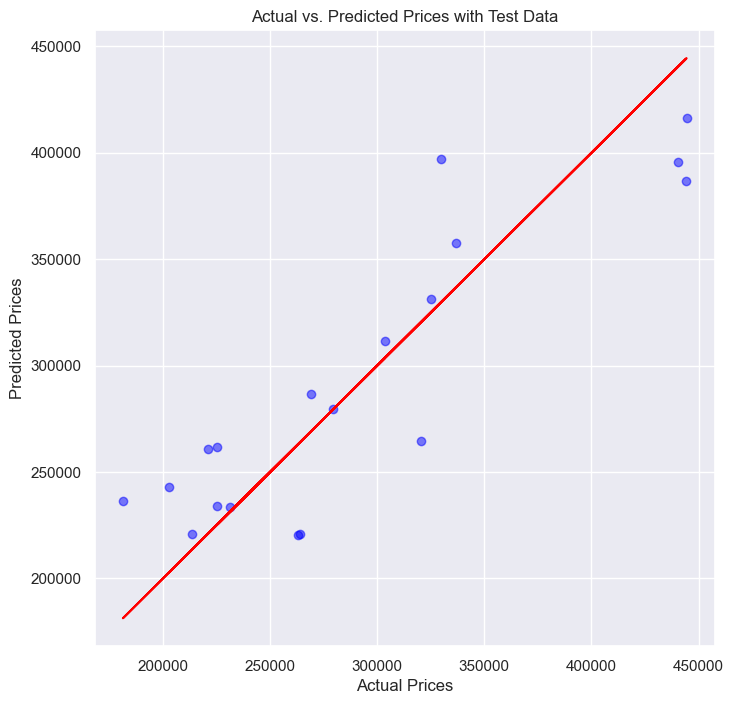

In [46]:
plt.figure(figsize=(8, 8))
plt.scatter(actual_y, test_prediction, color='blue', alpha=0.5)
plt.plot(actual_y, actual_y, color='red')
plt.title('Actual vs. Predicted Prices with Test Data')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()